In [50]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [39]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

df = pd.read_csv(f"{path}/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df.shape

(150, 6)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [42]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [43]:
df.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


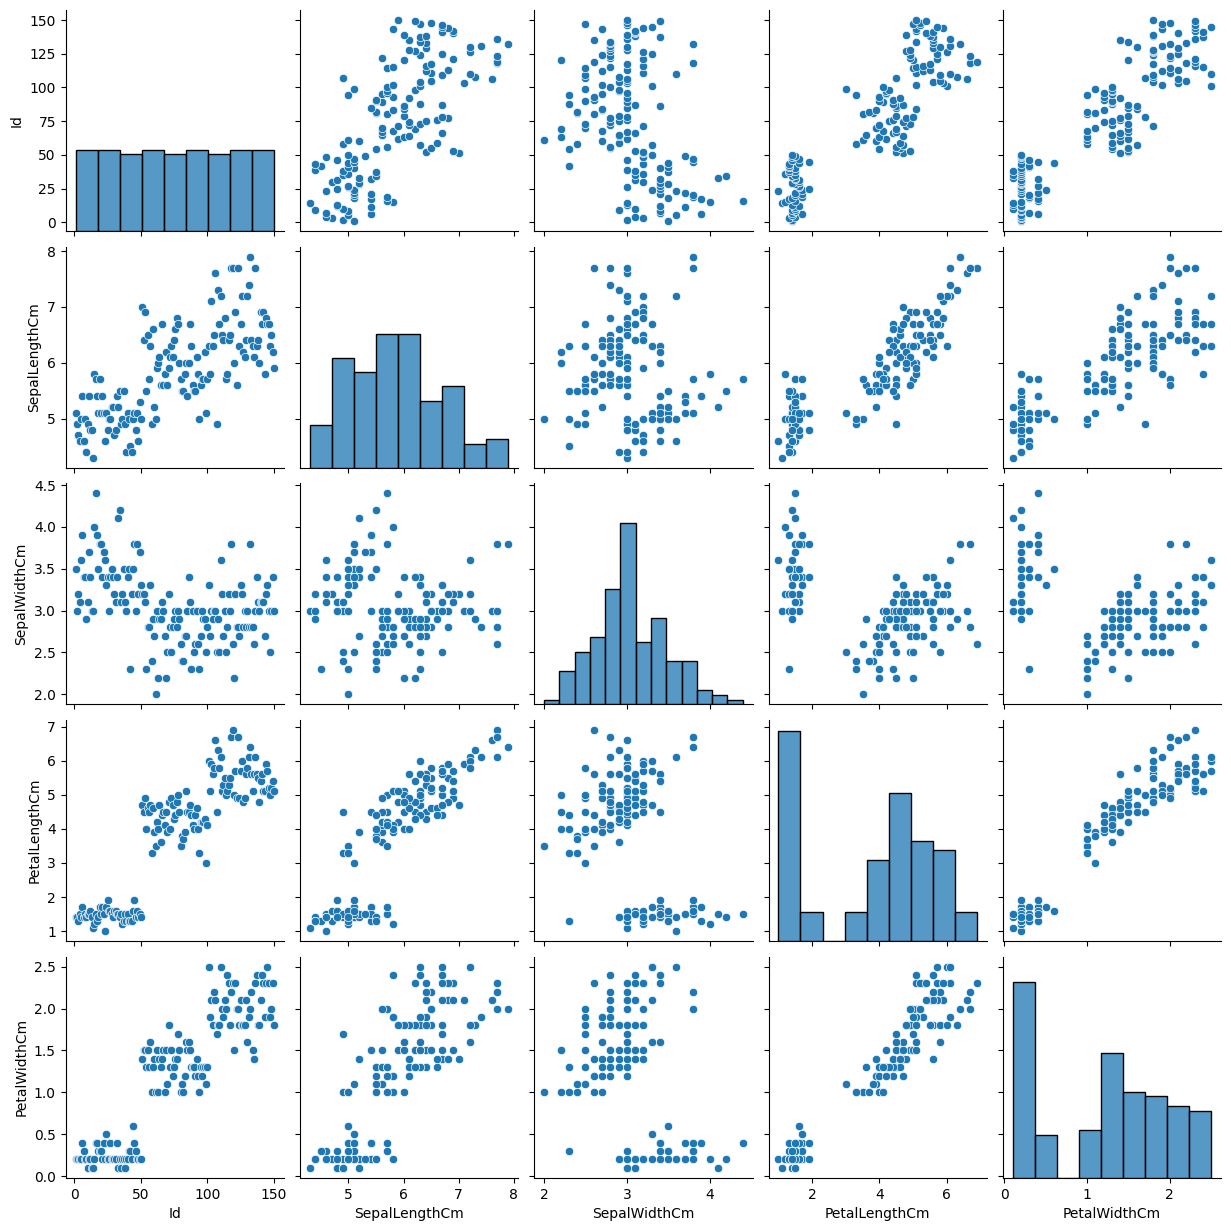

In [44]:
sns.pairplot(df)
plt.show()

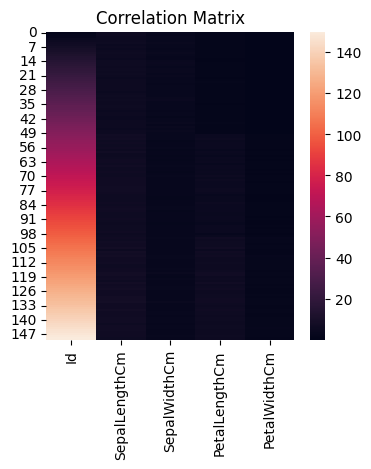

In [45]:
plt.figure(figsize=(4,4))
sns.heatmap(df.drop(columns=["Species"]))
plt.title('Correlation Matrix')
plt.show()

In [46]:
# Selecting features and target variable
X = df.drop(columns=['Species'])
y = df['Species']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and fitting the Bayesian classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



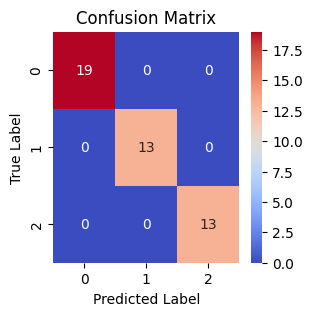

In [47]:
# Calculating precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Displaying the classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



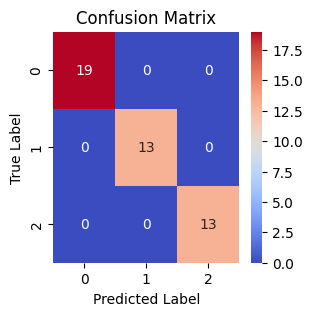

In [48]:

# Creating and fitting the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can explore different kernels like 'rbf', 'poly'
svm_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Displaying the classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# You can further explore other metrics like precision, recall, F1-score, etc.
# Refer to your Naive Bayes example for how to calculate and display those metrics.

Accuracy: 1.0


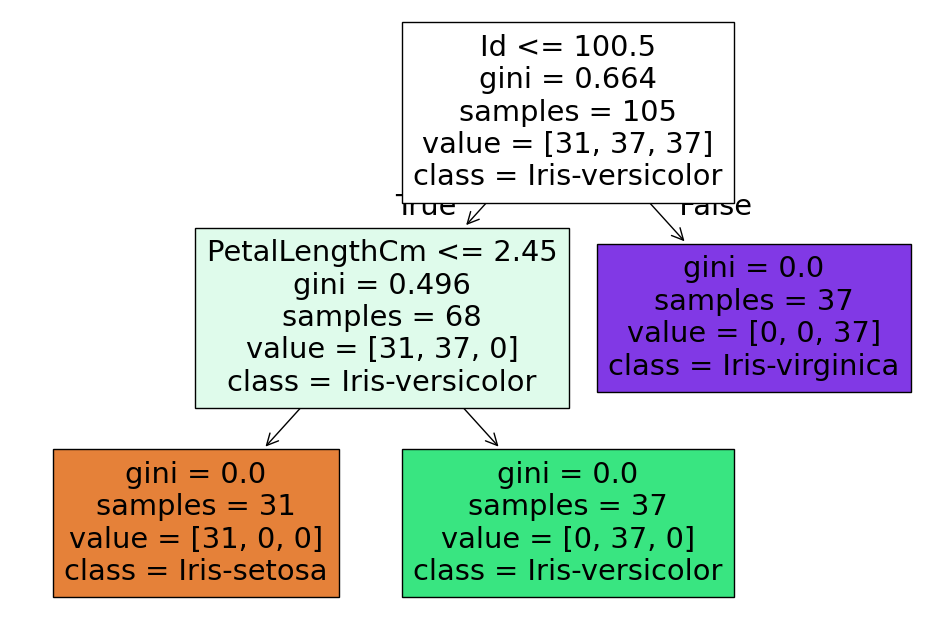

In [51]:

# Creating and fitting the Decision Tree classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = tree_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# You can further explore other metrics like precision, recall, F1-score, etc.
# Refer to your Naive Bayes example for how to calculate and display those metrics.
plt.figure(figsize=(12, 8))
plot_tree(tree_classifier, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()